In [11]:
from tensorflow import keras
(train_input,train_target), (test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [12]:
train_scaled = train_input /255.0
test_scaled = test_input/255.0

In [13]:
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2 , random_state=42
)

In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target,epochs=100)

Epoch 1/100
1500/1500 [==============================] - 1s 772us/step - loss: 0.2282 - accuracy: 0.9138
Epoch 2/100
1500/1500 [==============================] - 1s 690us/step - loss: 0.2194 - accuracy: 0.9176
Epoch 3/100
1500/1500 [==============================] - 1s 690us/step - loss: 0.2102 - accuracy: 0.9212
Epoch 4/100
1500/1500 [==============================] - 1s 699us/step - loss: 0.2040 - accuracy: 0.9239
Epoch 5/100
1500/1500 [==============================] - 1s 700us/step - loss: 0.2003 - accuracy: 0.9256
Epoch 6/100
1500/1500 [==============================] - 1s 691us/step - loss: 0.1946 - accuracy: 0.9268
Epoch 7/100
1500/1500 [==============================] - 1s 701us/step - loss: 0.1902 - accuracy: 0.9286
Epoch 8/100
1500/1500 [==============================] - 1s 697us/step - loss: 0.1841 - accuracy: 0.9318
Epoch 9/100
1500/1500 [==============================] - 1s 689us/step - loss: 0.1807 - accuracy: 0.9320
Epoch 10/100
1500/1500 [==============================]

In [25]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 0s 448us/step - loss: 0.8695 - accuracy: 0.8809


[0.8695071339607239, 0.8809000253677368]

In [26]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 531us/step - loss: 0.8187 - accuracy: 0.8823


[0.8186689615249634, 0.8823333382606506]

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 1s 845us/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 1.4913 - val_accuracy: 0.8813
Epoch 2/20
1500/1500 [==============================] - 1s 802us/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 1.6093 - val_accuracy: 0.8789
Epoch 3/20
1500/1500 [==============================] - 1s 788us/step - loss: 0.0399 - accuracy: 0.9884 - val_loss: 1.4360 - val_accuracy: 0.8842
Epoch 4/20
1500/1500 [==============================] - 1s 800us/step - loss: 0.0334 - accuracy: 0.9896 - val_loss: 1.4340 - val_accuracy: 0.8816
Epoch 5/20
1500/1500 [==============================] - 1s 800us/step - loss: 0.0381 - accuracy: 0.9886 - val_loss: 1.4421 - val_accuracy: 0.8812
Epoch 6/20
1500/1500 [==============================] - 1s 777us/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 1.4025 - val_accuracy: 0.8826
Epoch 7/20
1500/1500 [==============================] - 1s 789us/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 1.4362 -

In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


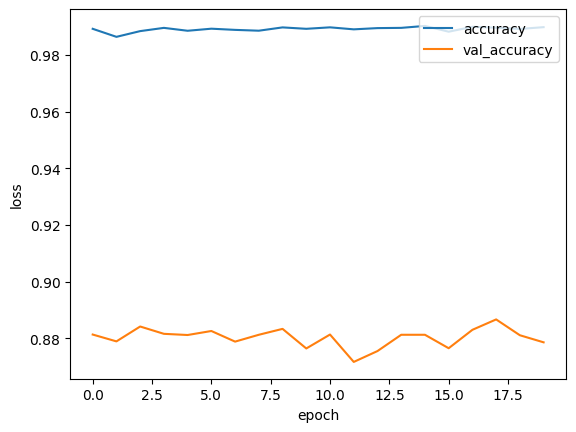

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label= 'accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28),name='Flatten'),
    keras.layers.Dense(100,activation='relu',name='Hidden'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax',name='Output')
])


In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=600,validation_data=(val_scaled,val_target))

Epoch 1/600
1500/1500 [==============================] - 1s 856us/step - loss: 0.3734 - accuracy: 0.8634 - val_loss: 0.3453 - val_accuracy: 0.8721
Epoch 2/600
1500/1500 [==============================] - 1s 812us/step - loss: 0.3660 - accuracy: 0.8639 - val_loss: 0.3432 - val_accuracy: 0.8773
Epoch 3/600
1500/1500 [==============================] - 1s 812us/step - loss: 0.3617 - accuracy: 0.8674 - val_loss: 0.3442 - val_accuracy: 0.8715
Epoch 4/600
1500/1500 [==============================] - 1s 812us/step - loss: 0.3605 - accuracy: 0.8654 - val_loss: 0.3338 - val_accuracy: 0.8760
Epoch 5/600
1500/1500 [==============================] - 1s 823us/step - loss: 0.3531 - accuracy: 0.8690 - val_loss: 0.3246 - val_accuracy: 0.8832
Epoch 6/600
1500/1500 [==============================] - 1s 823us/step - loss: 0.3532 - accuracy: 0.8682 - val_loss: 0.3408 - val_accuracy: 0.8777
Epoch 7/600
1500/1500 [==============================] - 1s 812us/step - loss: 0.3517 - accuracy: 0.8693 - val_loss: 0

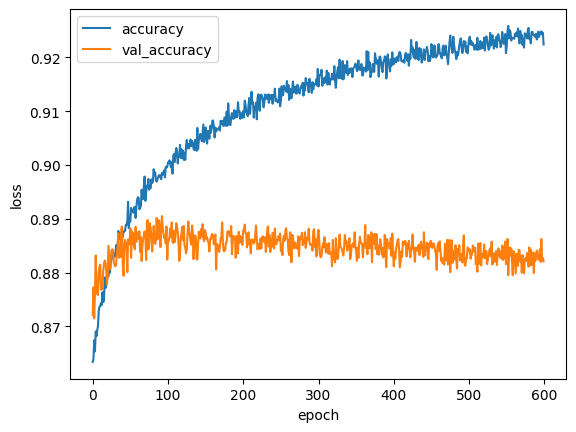

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label= 'accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()